In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Spam dataset\spam_ham_dataset.csv')
df

,Unnamed,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
enc = LabelEncoder()
df_num_cat = pd.DataFrame()

df_num_cat['Unnamed'] = enc.fit_transform(df['Unnamed'])
df_num_cat['label'] = enc.fit_transform(df['label'])
df_num_cat['text'] = enc.fit_transform(df['text'])
df_num_cat['label_num'] = enc.fit_transform(df['label_num'])

df_num_cat

,Unnamed,label,text,label_num
0,605,0,1209,0
1,2349,0,1985,0
2,3624,0,2774,0
3,4685,1,3158,1
4,2030,0,3613,0
...,...,...,...,...
5166,1518,0,3254,0
5167,404,0,125,0
5168,2933,0,495,0
5169,1409,0,2223,0


In [4]:
X = df_num_cat.drop(['label_num'],axis=1)
y = df_num_cat['label_num']
print(X)
print(y)

      Unnamed  label  text
0         605      0  1209
1        2349      0  1985
2        3624      0  2774
3        4685      1  3158
4        2030      0  3613
...       ...    ...   ...
5166     1518      0  3254
5167      404      0   125
5168     2933      0   495
5169     1409      0  2223
5170     4807      1  2195

[5171 rows x 3 columns]
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [6]:
X_train.shape,X_test.shape

((3464, 3), (1707, 3))

In [7]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [8]:
y_pred = clf_en.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [9]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.868\nsamples = 3464\nvalue = [2462, 1002]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2462\nvalue = [2462, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1002\nvalue = [0, 1002]')]

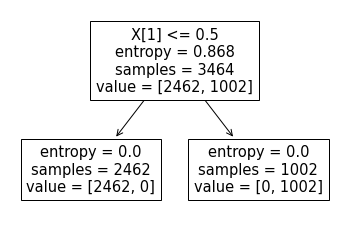

In [10]:
from sklearn import tree
tree.plot_tree(clf_en)

In [11]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.868\nsamples = 3464\nvalue = [2462, 1002]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2462\nvalue = [2462, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1002\nvalue = [0, 1002]')]

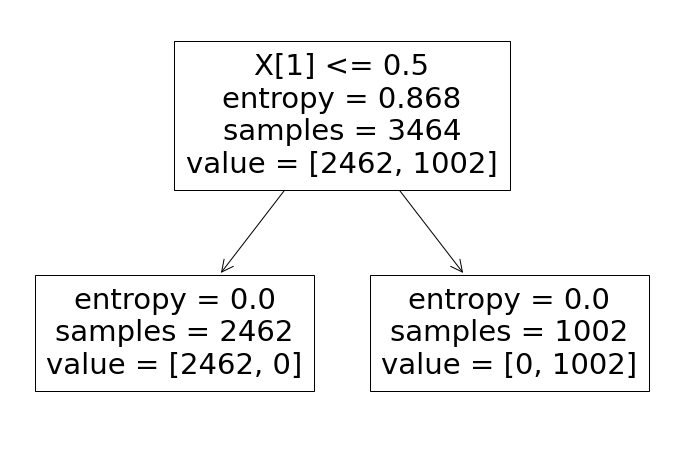

In [12]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1210    0]
 [   0  497]]


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       497

    accuracy                           1.00      1707
   macro avg       1.00      1.00      1.00      1707
weighted avg       1.00      1.00      1.00      1707



In [16]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       497

    accuracy                           1.00      1707
   macro avg       1.00      1.00      1.00      1707
weighted avg       1.00      1.00      1.00      1707

[[1210    0]
 [   0  497]]
Gaussian Naive Bayes accuracy is: 100.00%
